<a href="https://colab.research.google.com/github/20146467/TRITUENHANTAO/blob/main/BaitapW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=13cd55b48c0e8c3e5227d352932c08842502c7d1e5e2e74ded82015c522f91a2
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


58.71109498467984


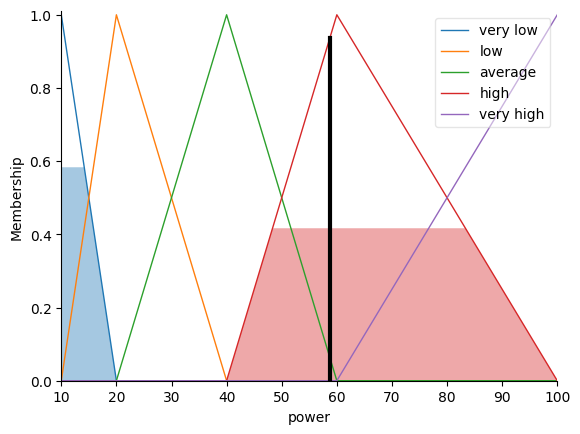

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'time')
rice = ctrl.Antecedent(np.arange(0,1001,1),'rice')
power = ctrl.Consequent(np.arange(10,101,1),'power')

time['very fast']= fuzz.trimf(time.universe,[0,0,20])
time['fast'] = fuzz.trimf(time.universe, [0,20,40])
time['normal']= fuzz.trimf(time.universe, [20,40,100])
time['slow']= fuzz.trimf(time.universe, [40,100,180])
time['very slow']= fuzz.trimf(time.universe, [100,180,180])

rice['very little']= fuzz.trimf(rice.universe,[100,100,300])
rice['little'] = fuzz.trimf(rice.universe, [100,300,400])
rice['average']= fuzz.trimf(rice.universe, [300,400,500])
rice['much']= fuzz.trimf(rice.universe, [400,500,1000])
rice['very much']= fuzz.trimf(rice.universe,[500,1000,1000])

power['very low'] = fuzz.trimf(power.universe, [10,10,20])
power['low'] = fuzz.trimf(power.universe,[10,20,40])
power['average'] = fuzz.trimf(power.universe,[20,40,60])
power['high'] = fuzz.trimf(power.universe,[40,60,100])
power['very high'] = fuzz.trimf(power.universe,[60,100,100])

rule1 = ctrl.Rule(time['very fast'] & rice['very little'], power['very high'])
rule2 = ctrl.Rule(time['very fast'] & rice['little'], power['very high'])
rule3 = ctrl.Rule(time['very fast'] & rice['average'], power['very high'])
rule4 = ctrl.Rule(time['very fast'] & rice['much'], power['very high'])
rule5 = ctrl.Rule(time['very fast'] & rice['very much'], power['very high'])

rule6 = ctrl.Rule(time['fast'] & rice['very little'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['very high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['very high'])
rule10 = ctrl.Rule(time['fast'] & rice['very much'],power['very high'])

rule11 = ctrl.Rule(time['normal'] & rice['very little'], power['low'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['very much'], power['high'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['very little'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['low'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['very low'])
rule20 = ctrl.Rule(time['slow'] & rice['very much'], power['very low'])

rule21 = ctrl.Rule(time['very slow'] & rice['very little'], power['very low'])
rule22 = ctrl.Rule(time['very slow'] & rice['little'], power['very low'])
rule23 = ctrl.Rule(time['very slow'] & rice['average'], power['very low'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'], power['very low'])
rule25 = ctrl.Rule(time['very slow'] & rice['very much'], power['very low'])

ncpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                   rule6, rule7, rule8, rule9, rule10,
                                   rule11, rule12, rule13, rule14, rule15,
                                   rule16, rule17, rule18, rule19, rule20,
                                  rule21, rule22, rule23, rule24, rule25])
ncpower = ctrl.ControlSystemSimulation(ncpower_ctrl)
ncpower.input['time'] = 75
ncpower.input['rice'] = 680
ncpower.compute()
print(ncpower.output['power'])
power.view(sim = ncpower)